In [95]:
# Import pandas,numpy & random
import pandas as pd
import numpy as np
import random as rnd

In [96]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [97]:
train_df = pd.read_csv('train.csv')       # READ CSV FILES
test_df = pd.read_csv('test.csv')

### Μία γρήγορη ματιά στο Dataset.
Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [98]:
#print(train_df.columns)
#print(train_df.columns.values)           # PRINT COLUMN VALUES - 4 CHOICES
#print(train_df.columns.values.tolist())
print(list(train_df))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [99]:
print(len(list(train_df))) # Ο αριθμός των στηλών

12


In [100]:
train_df.head(3) # Εμφάνιση των 3 πρώτων γραμμών

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [101]:
print(train_df.info())
print('-'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------------------------------------------------------------------


### Έλεγχος για καταχωρήσεις που πιθανόν να λείπουν.
Σε σύνολο 891 καταχωρήσεων, βλέπουμε ότι λείπουν 
    - 177 καταχωρήσεις στην ηλικία
    - 687 καταχωρήσεις στην καμπίνα
    - 2 καταχωρήσεις στην στήλη της επιβίβασης. Ο αριθμός των συνολικών καταχωρήσεων που λείπουν είναι 866.
Ακολουθεί αναπαράσταση με heatmap, για να έχουμε μία εικόνα.

In [102]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  866  καταχωρήσεις
--------------------------------------------------


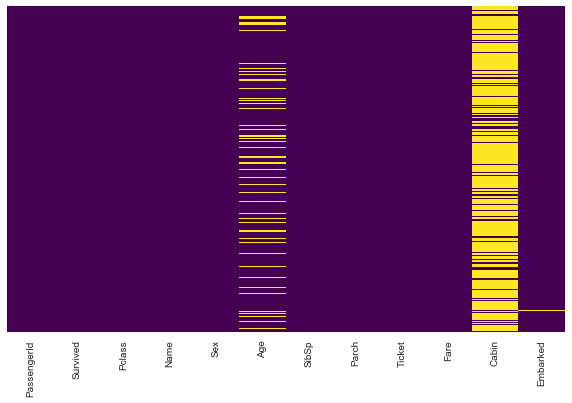

In [103]:
plt.figure(figsize=(10,6))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [104]:
#train_df.describe(include=['Ο'])
#train_df.describe()
train_df.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baumann, Mr. John D",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### DATA ANALYSIS

Θα προσπαθήσουμε να κατανοήσουμε εάν οι θάνατοι που προήλθαν από την βύθιση του Τιτανικού, ήταν τυχαίοι ή επηρεάστηκαν από διάφορους παράγοντες.
    - Για παράδειγμα, ίσως οι θάνατοι επηρεάζονται από την ηλικία. Μπορεί άτομα μικρής ή μεγάλης ηλικίας να είχαν προτεραιότητα στις σωσίβιες λέμβους.
    - Ίσως επίσης, να είχαν προτεραιότητα οι γυναίκες.
    - Επιπλέον, είναι πολύ πιθανό να υπήρχε διαχωρισμός των επιβατών, ανάμεσα σε αυτούς της πρώτης κατηγορίας και σε εκείνους των χαμηλότερων.
    
Με τον έλεγχο, επιβεβαιώνουμε ότι πολλά πράγματα έπαιξαν τον ρόλο τους σε αυτό το κομμάτι.
    - Απο τα 342 άτομα που διασώθηκαν, τα 136 ήταν της πρώτης κλάσης, τα 119 της μεσσαίας κλάσης και τα υπόλοιπα 87 βρισκόταν στην τρίτης κλάση.
    - Από το σύνολο των ανθρώπων που σώθηκαν, οι 233 ήταν γυναίκες και οι 109 άντρες.
    
    - To 63% των επιβατών της πρώτης κλάσης επέζησε του δυστυχήματος. Από τους επιβάτες της τρίτης κλάσης, επιβίωσε μόνο το 24%.
    - Το 74% των γυναικών επιβίωσε, ενώ το αντίστοιχο ποσοστό των ανδρών είναι 18%.

Συνολικά σώθηκαν: 342  άτομα.
----------------------------------------------------------------------------------------------------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
   Pclass  Survived
0       1       136
2       3       119
1       2        87
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136    0.397661
2       3       119    0.347953
1       2        87    0.254386
----------------------------------------------------------------------------------------------------


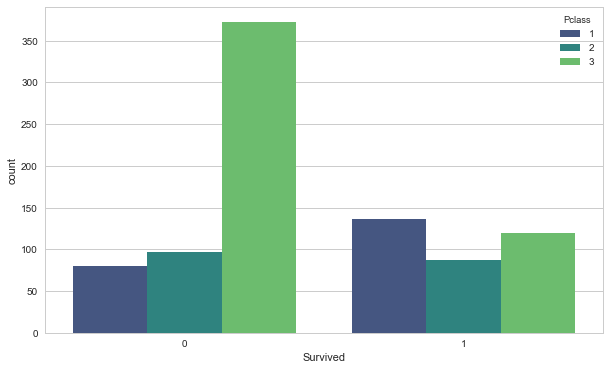

In [105]:
# ΕΛΕΓΧΟΣ CLASS
print('Συνολικά σώθηκαν:',train_df['Survived'].sum(),' άτομα.')
print('-'*100)
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).sum().sort_values(by='Survived', ascending=False)
print(a)
print('-'*100)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)
print('-'*100)
plt.figure(figsize=(10,6))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='viridis')

Συνολικά σώθηκαν: 342  άτομα.
----------------------------------------------------------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------------------------------------------------------------------------
      Sex  Survived
0  female       233
1    male       109
----------------------------------------------------------------------------------------------------
      Sex  Survived  Percentage
0  female       233    0.681287
1    male       109    0.318713
----------------------------------------------------------------------------------------------------


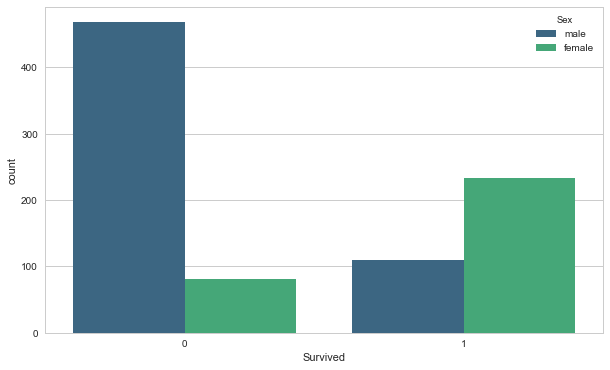

In [106]:
# ΕΛΕΓΧΟΣ ΦΥΛΛΟΥ
print('Συνολικά σώθηκαν:',train_df['Survived'].sum(),' άτομα.')
print('-'*100)
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).sum().sort_values(by='Survived', ascending=False)
print(b)
print('-'*100)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)
print('-'*100)
plt.figure(figsize=(10,6))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='viridis')

Παρατηρούμε ότι η πλειοψηφία των επιβατών, είναι ηλικίας 18 έως 40 ετών.

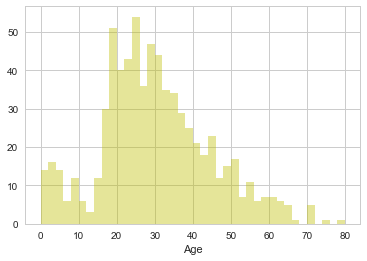

In [107]:
# #train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()
bins = np.arange(0, 82, 2)
ax = sns.distplot(x, kde=False, bins = bins, color = 'y')

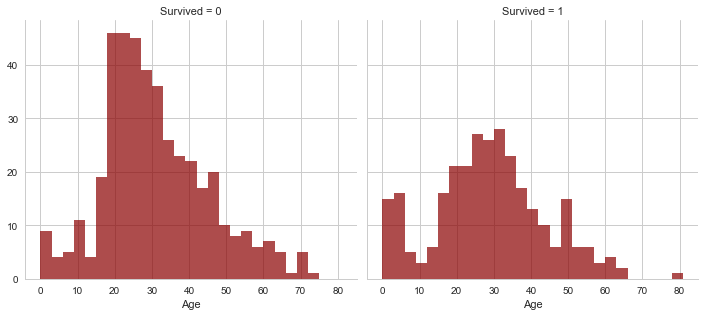

In [109]:
# ΕΛΕΓΧΟΣ ΗΛΙΚΙΑΣ
bins = np.arange(0, 82, 3)
g = sns.FacetGrid(train_df, col="Survived", size=4.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)